# Laboratorio 1 CD Algoritmo de agrupamiento K-means 

División de Estudios de Posgrado e Investigación Instituto Tecnológico de Oaxaca

Maestría en Ciencias de la Ingeniería

Docente: Dr. Carlos Mauricio Lastre Domínguez

Alumno: Josué Hueto López 

# Actividad 1
1. Crear un conjunto de datos de dos características que contenga 3 grupos y visualizarlos
2. Aplicar el algoritmo K-means por selección con centroides iniciales declarados aleatoriamente con: 10,30,50 iteraciones
3. Escriba una conclusión respecto a los recursos computacionales que conlleva aplicar el algorimto K-means cuando sus centroides son declarados de manera aleatoria

In [107]:
# SE IMPORTAN LAS SIGUIENTES LIBRERIAS

import numpy as np
import matplotlib.pyplot as plt
from utils import *

%matplotlib inline
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

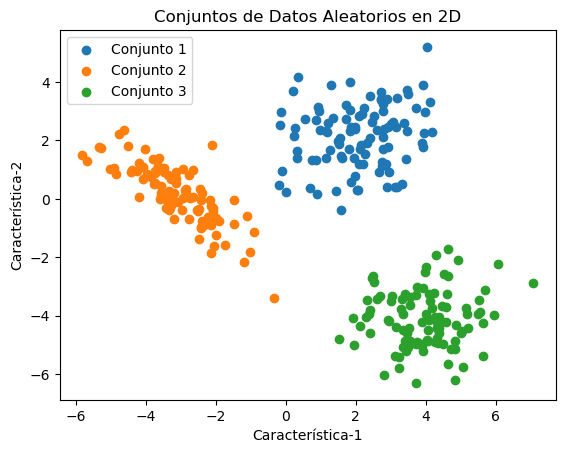

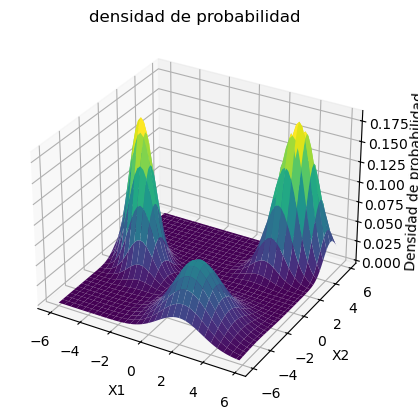

In [108]:
# Configurar la semilla para reproducibilidad
np.random.seed(42)

# Generar conjunto de datos aleatorio 1
mean1 = [2, 2]
covariance1 = [[1.5, 0.5], [0.5, 1.5]]
data1 = np.random.multivariate_normal(mean1, covariance1, 100)

# Generar conjunto de datos aleatorio 2
mean2 = [-3, 0]
covariance2 = [[1, -0.75], [-0.75, 1]]
data2 = np.random.multivariate_normal(mean2, covariance2, 100)

# Generar conjunto de datos aleatorio 3
mean3 = [4, -4]
covariance3 = [[1, 0], [0, 1]]
data3 = np.random.multivariate_normal(mean3, covariance3, 100)


# Combinación de todos los datos
datos = np.concatenate(([data1], [data2], [data3]), axis=0)




# Visualizar los conjuntos de datos
plt.scatter(data1[:, 0], data1[:, 1], label='Conjunto 1')
plt.scatter(data2[:, 0], data2[:, 1], label='Conjunto 2')
plt.scatter(data3[:, 0], data3[:, 1], label='Conjunto 3')

plt.title('Conjuntos de Datos Aleatorios en 2D')
plt.xlabel('Característica-1')
plt.ylabel('Característica-2')
plt.legend()
plt.show()



# Visualizar en 3D

#------------------------- Primera distribución---------------------------

# Parámetros
mu1 = [4, 4]
sigma1 = np.array([[1, 0.5], [0.5, 1]])

# Crear mallas
x1 = np.arange(-6, 6, 0.2)
x2 = np.arange(-6, 6, 0.2)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.flatten(), X2.flatten()))

# Calcular la función de densidad de probabilidad
y1 = multivariate_normal.pdf(X, mean=mu1, cov=sigma1)
y1 = y1.reshape(len(x2), len(x1))


#------------------------- Segunda  distribución---------------------------


# Parámetros
mu2 = [-4, 0]
sigma2 = np.array([[1, -0.5], [-0.5, 1]])

# Crear mallas
x1 = np.arange(-6, 6, 0.2)
x2 = np.arange(-6, 6, 0.2)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.flatten(), X2.flatten()))

# Calcular la función de densidad de probabilidad
y2 = multivariate_normal.pdf(X, mean=mu2, cov=sigma2)
y2 = y2.reshape(len(x2), len(x1))



#------------------------- Tercera  distribución---------------------------


# Parámetros
mu3 = [2, -4]
sigma3 = np.array([[2, 0], [0, 2]])

# Crear mallas
x1 = np.arange(-6, 6, 0.2 )
x2 = np.arange(-6, 6, 0.2)
X1, X2 = np.meshgrid(x1, x2)
X = np.column_stack((X1.flatten(), X2.flatten()))

# Calcular la función de densidad de probabilidad
y3 = multivariate_normal.pdf(X, mean=mu3, cov=sigma3)
y3 = y3.reshape(len(x2), len(x1))

#-----------------------------------------------------------------------------

# Sumar todas las distribuciones

y_resul=y1+y2+y3


# Visualizar en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, y_resul, cmap='viridis')




ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Densidad de probabilidad')
ax.set_title('densidad de probabilidad')

plt.show()

In [109]:
# Load an example dataset that we will be using
datos = np.concatenate((data1, data2, data3), axis=0)
X =datos
X = load_data()

In [110]:
print("First five elements of X are:\n", X[:5]) 
print('The shape of X is:', X.shape)

First five elements of X are:
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is: (300, 2)


# Aplicación del algoritmo K-means

In [111]:
# UNQ_C1
# GRADED FUNCTION: find_closest_centroids

def find_closest_centroids(X, centroids):
    """
    Computes the centroid memberships for every example
    
    Args:
        X (ndarray): (m, n) Input values      
        centroids (ndarray): (K, n) centroids
    
    Returns:
        idx (array_like): (m,) closest centroids
    
    """

    # Set K
    K = centroids.shape[0]

    # You need to return the following variables correctly
    idx = np.zeros(X.shape[0], dtype=int)

   
    
    for i in range(X.shape[0]):
        # Array to hold distance between X[i] and each centroids[j]
        distance = [] 
        for j in range(centroids.shape[0]):
            
             ### START CODE HERE ###
            norm_ij =  np.sqrt(np.sum(np.power((X[i] - centroids[j]),2)))   # Your code to calculate the norm between (X[i] - centroids[j])
            #norm_ij = np.power(np.linalg.norm(X[i] - centroids[j]),2) 
             ### END CODE HERE ###
            distance.append(norm_ij) # Concatenate

        idx[i] = np.argmin(distance) # Your code here to calculate index of minimum value in distance
        
    #print(norm_ij)
    #print(norm_ij_1)
    
    return idx

# Selección de centroides

In [112]:
# Select an initial set of centroids (3 Centroids)
initial_centroids = np.array([[3,3], [6,2], [8,5]])
# Find closest centroids using initial_centroids
idx = find_closest_centroids(X, initial_centroids)

# Print closest centroids for the first three elements
print("First three elements in idx are:", idx[:3])

# UNIT TEST
#from public_tests import *

#find_closest_centroids_test(find_closest_centroids)

First three elements in idx are: [0 2 1]


# Calculando las medias del centroide

In [113]:
# UNQ_C2
# GRADED FUNCTION: compute_centroids

def compute_centroids(X, idx, K):
    """
    Returns the new centroids by computing the means of the 
    data points assigned to each centroid.
    
    Args:
        X (ndarray):   (m, n) Data points
        idx (ndarray): (m,) Array containing index of closest centroid for each 
                       example in X. Concretely, idx[i] contains the index of 
                       the centroid closest to example i
        K (int):       number of centroids
    
    Returns:
        centroids (ndarray): (K, n) New centroids computed
    """
    
    # Useful variables
    m, n = X.shape
    
    # You need to return the following variables correctly
    centroids =  np.zeros((K, n))
    
    ### START CODE HERE ###
    for k in range(K): 
        points = X[idx == k] # Your code here to get a list of all data points in X assigned to centroid k  
        centroids[k] = np.mean(points, axis = 0) # Your code here to compute the mean of the points assigned
        
        
    ### END CODE HERE ## 
    
    return centroids

# Verificando su implementación

In [114]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

# UNIT TEST
#compute_centroids_test(compute_centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


# K-medias en un conjunto de datos de muestra

In [115]:
# You do not need to implement anything for this part

def run_kMeans(X, initial_centroids, max_iters=10, plot_progress=False):
    """
    Runs the K-Means algorithm on data matrix X, where each row of X
    is a single example
    """
    
    # Initialize values
    m, n = X.shape
    K = initial_centroids.shape[0]
    centroids = initial_centroids
    previous_centroids = centroids    
    idx = np.zeros(m)
    plt.figure(figsize=(8, 6))

    # Run K-Means
    for i in range(max_iters):
        
        #Output progress
        print("K-Means iteration %d/%d" % (i, max_iters-1))
        
        # For each example in X, assign it to the closest centroid
        idx = find_closest_centroids(X, centroids)
        
        # Optionally plot progress
        if plot_progress:
            plot_progress_kMeans(X, centroids, previous_centroids, idx, K, i)
            previous_centroids = centroids
            
        # Given the memberships, compute new centroids
        centroids = compute_centroids(X, idx, K)
    plt.show() 
    return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


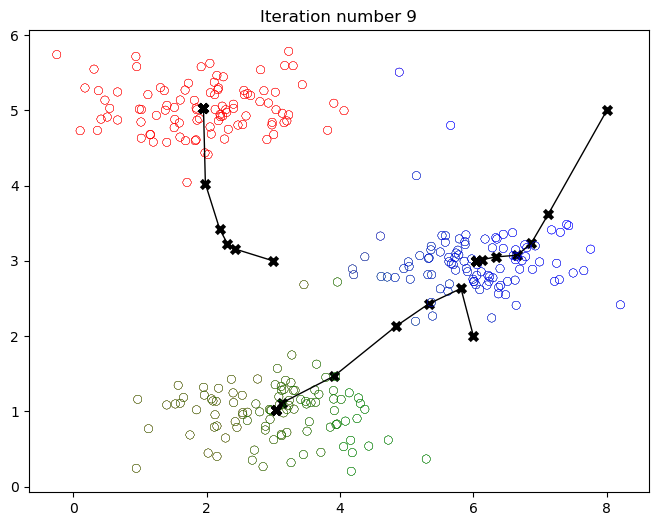

In [116]:
# Load an example dataset
#X = load_data()
#
#X=data

# Set initial centroids
initial_centroids = np.array([[3,3], [6,2], [8,5]])
# Number of iterations
max_iters = 10

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Algoritmo K-means por selección de centroides iniciales declarados aleatoriamente con: 10 iteraciones

In [117]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


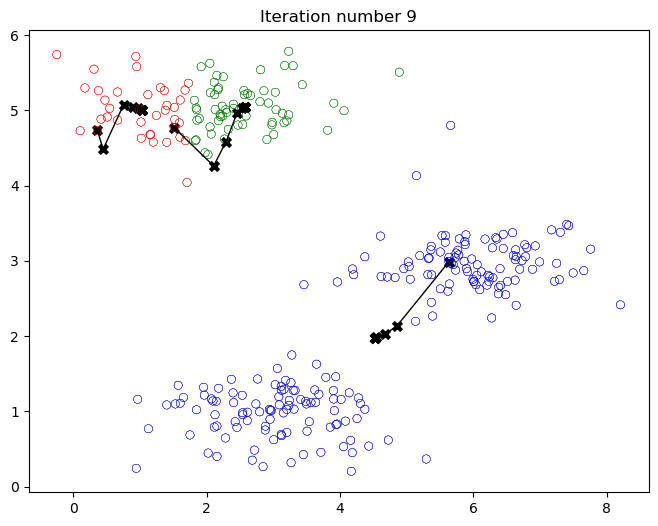

In [118]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 10

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Algoritmo K-means por selección de centroides iniciales declarados aleatoriamente con: 30 iteraciones

In [119]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/29
K-Means iteration 1/29
K-Means iteration 2/29
K-Means iteration 3/29
K-Means iteration 4/29
K-Means iteration 5/29
K-Means iteration 6/29
K-Means iteration 7/29
K-Means iteration 8/29
K-Means iteration 9/29
K-Means iteration 10/29
K-Means iteration 11/29
K-Means iteration 12/29
K-Means iteration 13/29
K-Means iteration 14/29
K-Means iteration 15/29
K-Means iteration 16/29
K-Means iteration 17/29
K-Means iteration 18/29
K-Means iteration 19/29
K-Means iteration 20/29
K-Means iteration 21/29
K-Means iteration 22/29
K-Means iteration 23/29
K-Means iteration 24/29
K-Means iteration 25/29
K-Means iteration 26/29
K-Means iteration 27/29
K-Means iteration 28/29
K-Means iteration 29/29


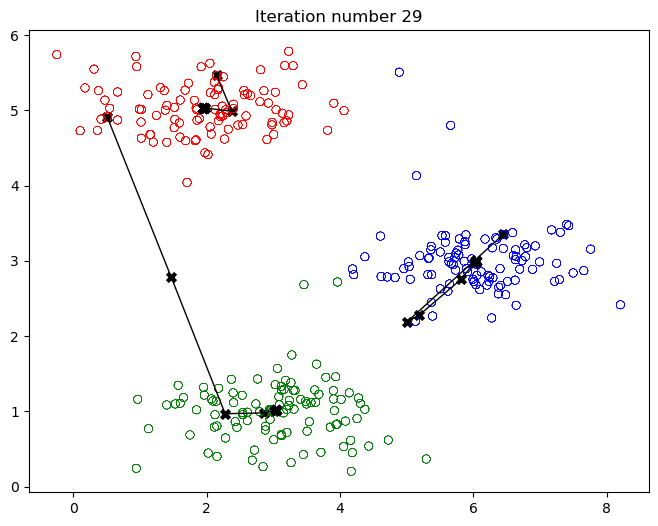

In [120]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 30

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Algoritmo K-means por selección de centroides iniciales declarados aleatoriamente con: 50 iteraciones

In [121]:
# You do not need to modify this part

def kMeans_init_centroids(X, K):
    """
    This function initializes K centroids that are to be 
    used in K-Means on the dataset X
    
    Args:
        X (ndarray): Data points 
        K (int):     number of centroids/clusters
    
    Returns:
        centroids (ndarray): Initialized centroids
    """
    
    # Randomly reorder the indices of examples
    randidx = np.random.permutation(X.shape[0])
    
    # Take the first K examples as centroids
    centroids = X[randidx[:K]]
    
    return centroids

K-Means iteration 0/49
K-Means iteration 1/49
K-Means iteration 2/49
K-Means iteration 3/49
K-Means iteration 4/49
K-Means iteration 5/49
K-Means iteration 6/49
K-Means iteration 7/49
K-Means iteration 8/49
K-Means iteration 9/49
K-Means iteration 10/49
K-Means iteration 11/49
K-Means iteration 12/49
K-Means iteration 13/49
K-Means iteration 14/49
K-Means iteration 15/49
K-Means iteration 16/49
K-Means iteration 17/49
K-Means iteration 18/49
K-Means iteration 19/49
K-Means iteration 20/49
K-Means iteration 21/49
K-Means iteration 22/49
K-Means iteration 23/49
K-Means iteration 24/49
K-Means iteration 25/49
K-Means iteration 26/49
K-Means iteration 27/49
K-Means iteration 28/49
K-Means iteration 29/49
K-Means iteration 30/49
K-Means iteration 31/49
K-Means iteration 32/49
K-Means iteration 33/49
K-Means iteration 34/49
K-Means iteration 35/49
K-Means iteration 36/49
K-Means iteration 37/49
K-Means iteration 38/49
K-Means iteration 39/49
K-Means iteration 40/49
K-Means iteration 41/49
K-

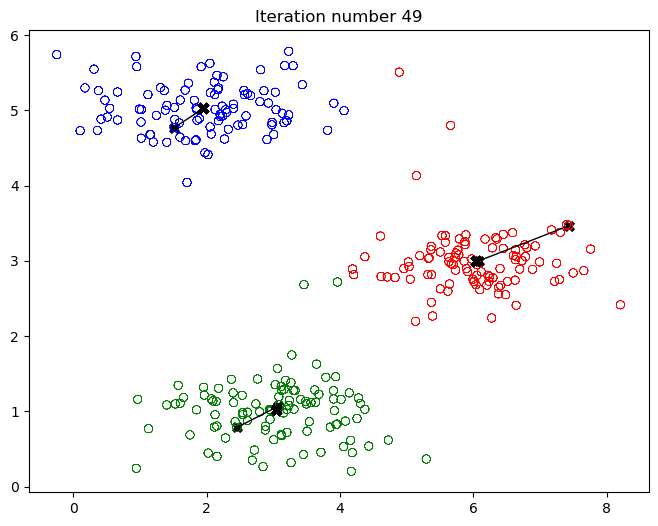

In [122]:
# Run this cell repeatedly to see different outcomes.

# Set number of centroids and max number of iterations
K = 3
max_iters = 50

# Set initial centroids by picking random examples from the dataset
initial_centroids = kMeans_init_centroids(X, K)

# Run K-Means
centroids, idx = run_kMeans(X, initial_centroids, max_iters, plot_progress=True)

# Conclusión

En conclusión, al aplicar el algoritmo K-means con centroides declarados de manera aleatoria, se requiere un mayor uso de recursos computacionales debido a la necesidad de iteraciones adicionales para converger hacia una solución óptima. Aunque este enfoque puede proporcionar resultados aceptables en conjuntos de datos pequeños o de baja dimensionalidad, en conjuntos de datos grandes o de alta dimensionalidad, puede resultar ineficiente y requerir un tiempo considerable para converger hacia una solución satisfactoria. Por lo tanto, es importante considerar estrategias alternativas, como la inicialización inteligente de centroides, para mejorar la eficiencia del algoritmo K-means.



# Actividad 2

 1. Buscar una imagen PNG (No de muy alta resolución) y aplicar la comprensión por medio de K-means para K=7,10,15.
 2. Escribir algunas conclusiones al respecto.

# Cargar la imagen para aplicar compresión con el algoritmo K-means con 7 iteraciones

In [123]:
# Load an image of a bird
#original_img = plt.imread('bird_small.png')
original_img = plt.imread('panchito.png')

### Visualizar la imagen

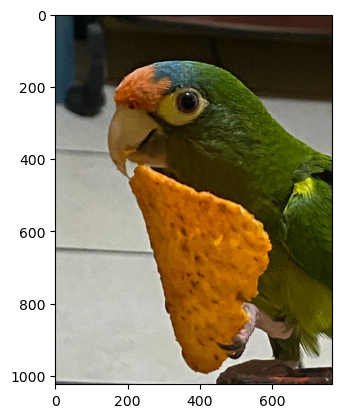

In [124]:
# Visualizing the image
plt.imshow(original_img)

### Comprobar la dimensión de la variable

In [125]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1024, 768, 4)


### Procesar datos

In [126]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))

# Compresión para K-means con 7 iteraciones

In [127]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 4
max_iters = 7

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/6
K-Means iteration 1/6
K-Means iteration 2/6
K-Means iteration 3/6
K-Means iteration 4/6
K-Means iteration 5/6
K-Means iteration 6/6


<Figure size 800x600 with 0 Axes>

In [128]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (786432,)
Closest centroid for the first five elements: [2 2 2 2 2]


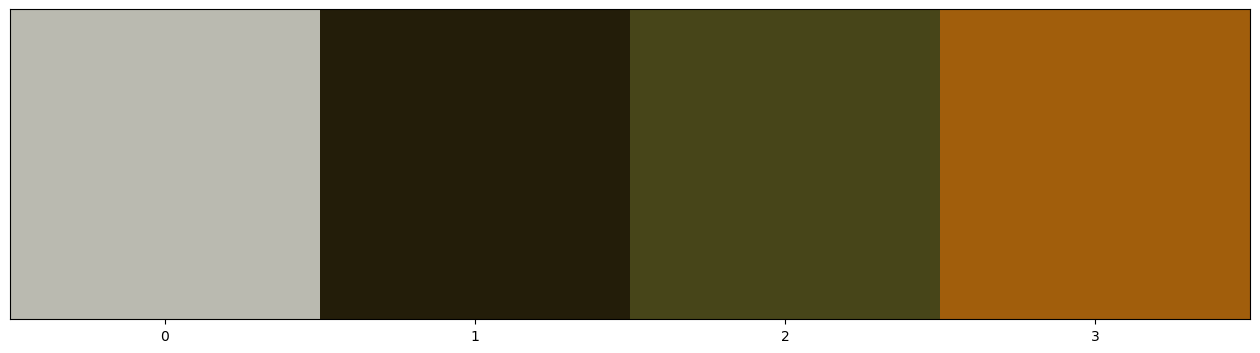

In [129]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

### Comprimir la imagen

In [130]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

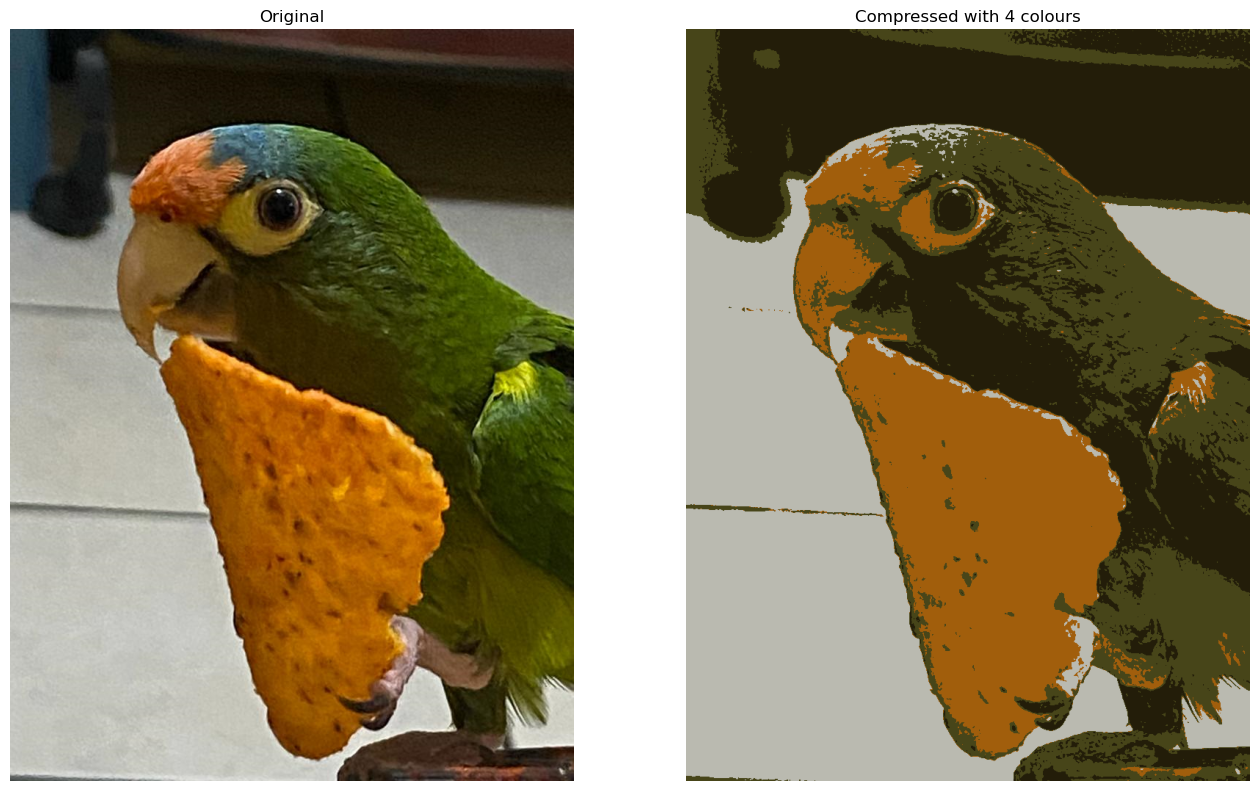

In [131]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

# Cargar la imagen para aplicar compresión con el algoritmo K-means con 10 iteraciones

In [132]:
# Load an image of a bird
#original_img = plt.imread('bird_small.png')
original_img = plt.imread('panchito.png')

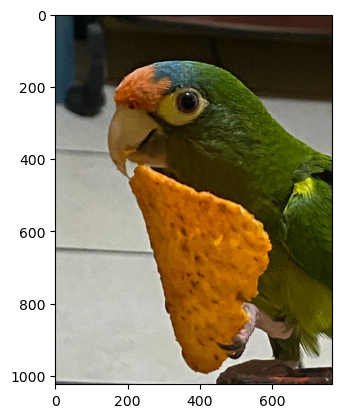

In [133]:
# Visualizing the image
plt.imshow(original_img)

In [134]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1024, 768, 4)


In [135]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))

In [136]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 4
max_iters = 10

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/9
K-Means iteration 1/9
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


<Figure size 800x600 with 0 Axes>

In [137]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (786432,)
Closest centroid for the first five elements: [2 2 2 2 2]


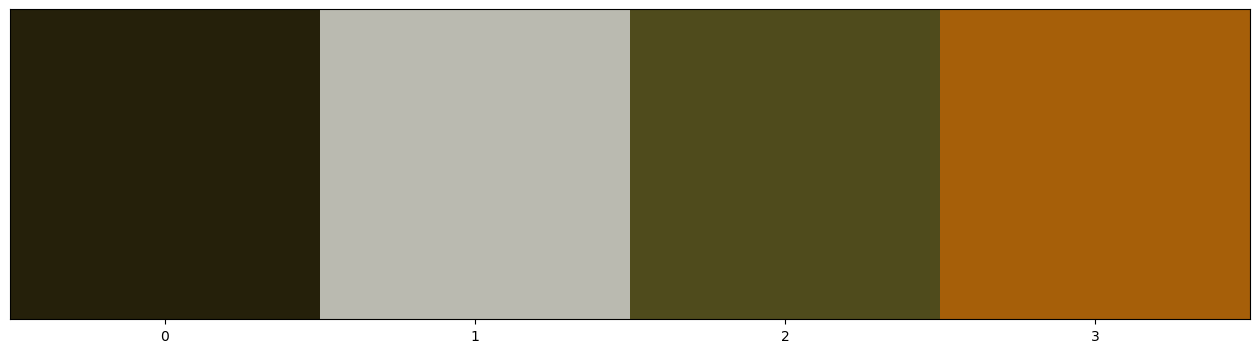

In [138]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [139]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

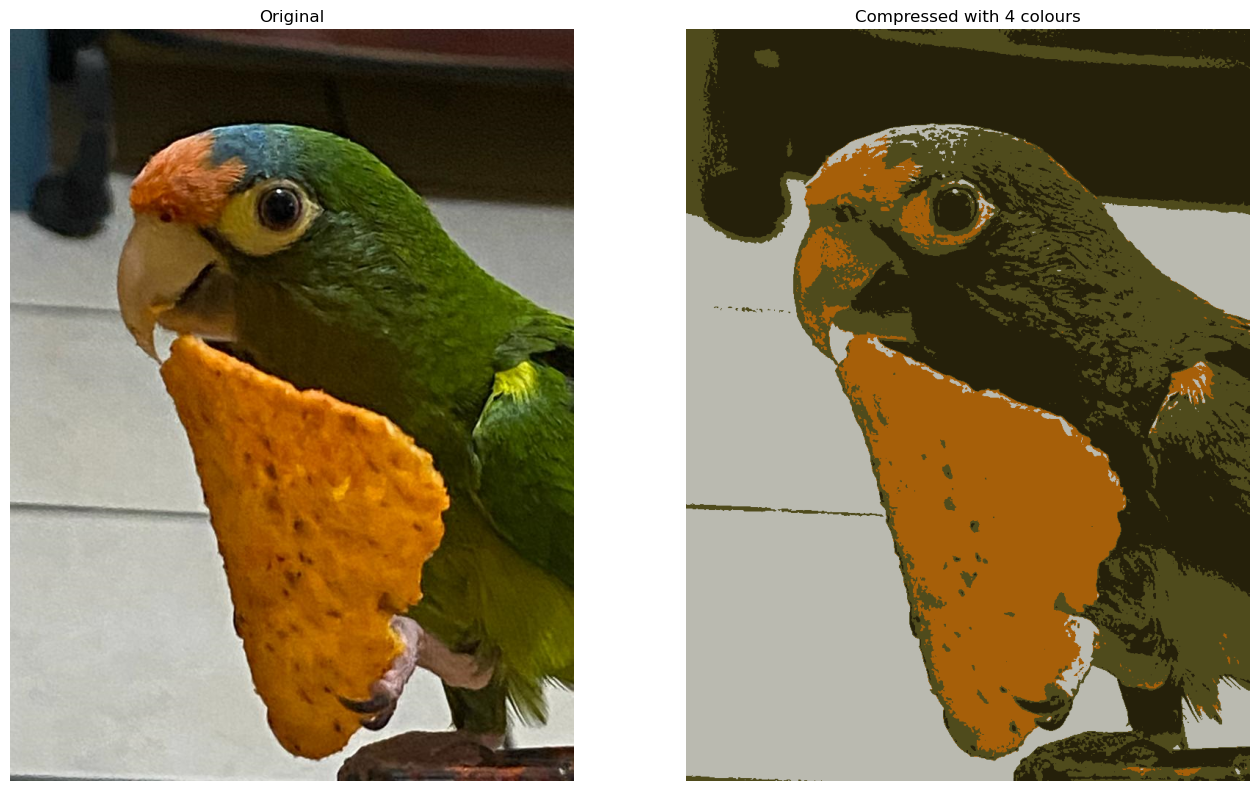

In [140]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

# Cargar la imagen para aplicar compresión con el algoritmo K-means con 15 iteraciones

In [141]:
# Load an image of a bird
#original_img = plt.imread('bird_small.png')
original_img = plt.imread('panchito.png')

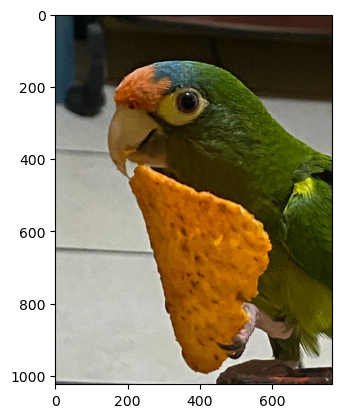

In [142]:
# Visualizing the image
plt.imshow(original_img)

In [143]:
print("Shape of original_img is:", original_img.shape)

Shape of original_img is: (1024, 768, 4)


In [144]:
# Divide by 255 so that all values are in the range 0 - 1 (not needed for PNG files)
# original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 4))

In [145]:
# Run your K-Means algorithm on this data
# You should try different values of K and max_iters here
K = 4
max_iters = 15

# Using the function you have implemented above. 
initial_centroids = kMeans_init_centroids(X_img, K)

# Run K-Means - this can take a couple of minutes depending on K and max_iters
centroids, idx = run_kMeans(X_img, initial_centroids, max_iters)

K-Means iteration 0/14
K-Means iteration 1/14
K-Means iteration 2/14
K-Means iteration 3/14
K-Means iteration 4/14
K-Means iteration 5/14
K-Means iteration 6/14
K-Means iteration 7/14
K-Means iteration 8/14
K-Means iteration 9/14
K-Means iteration 10/14
K-Means iteration 11/14
K-Means iteration 12/14
K-Means iteration 13/14
K-Means iteration 14/14


<Figure size 800x600 with 0 Axes>

In [146]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (786432,)
Closest centroid for the first five elements: [0 0 0 0 0]


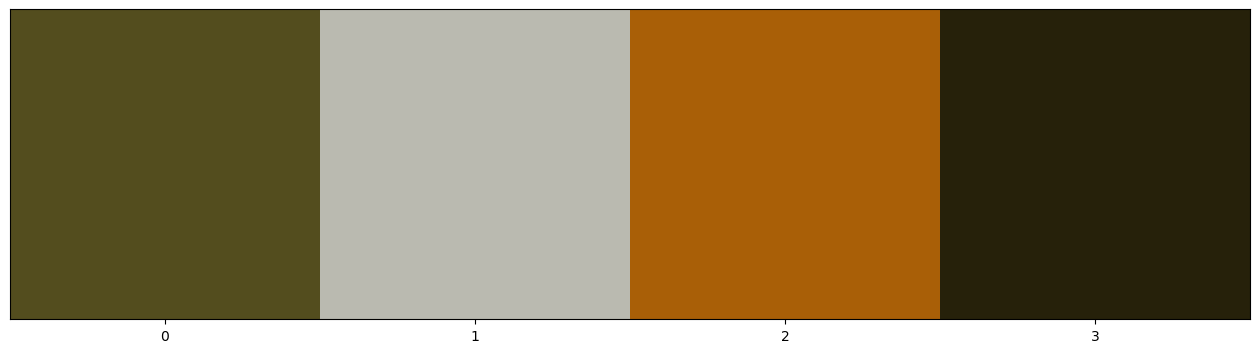

In [147]:
# Visualize the 16 colors selected
show_centroid_colors(centroids)

In [148]:
# Find the closest centroid of each pixel
idx = find_closest_centroids(X_img, centroids)

# Replace each pixel with the color of the closest centroid
X_recovered = centroids[idx, :] 

# Reshape image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

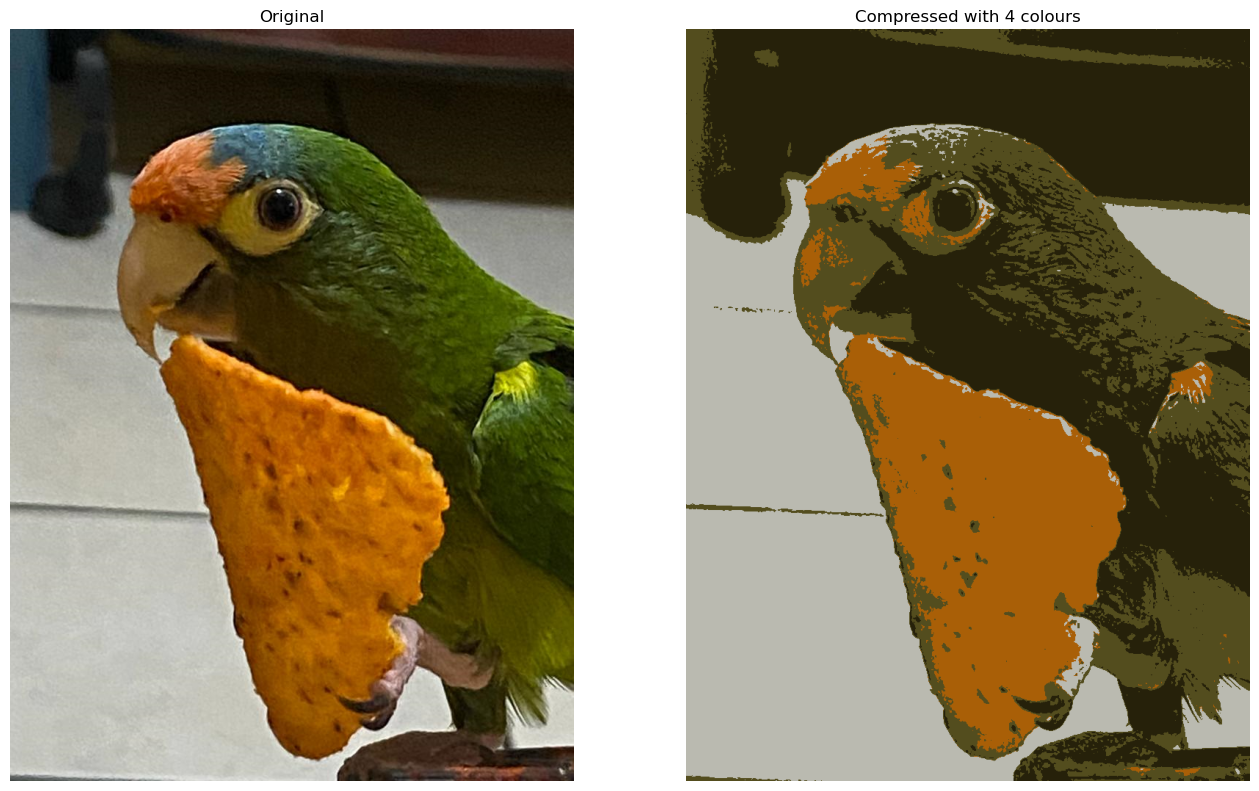

In [149]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

# Conclusión

En conclusión, al aplicar el algoritmo K-means en la compresión de imágenes con diferentes números de iteraciones (7, 10 y 15), se observa que a medida que aumenta el número de iteraciones, también lo hace la calidad de la imagen comprimida. Sin embargo, este aumento en la calidad conlleva un costo computacional mayor, ya que se necesitan más recursos para realizar un mayor número de iteraciones. Por lo tanto, la elección del número de iteraciones debe equilibrar la calidad deseada de la imagen comprimida con los recursos computacionales disponibles.

# Enlace al repositorio

